# Datacamp: Introduction to Numpy

    Alexandre Gramfort : alexandre.gramfort@inria.fr

The main goal of this notebook is to get familiar with Python and NumPy by manipulating a famous dataset in machine learning.

The data are embedded in the `scikit-learn` library.

This dataset is known as digits and contains images of hand-written digits with theirs associated labels.

# I - Manipulations and visualization of the `digits` dataset

## Imports et intialisation

In [1]:
import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

## Dataset description

We will load the `digits` dataset available in `scikit-learn` (the import name is `sklearn`). This dataset contains images of hand-written digits.

In [2]:
# Load the dataset from scikit-learn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
X.shape

(1797, 64)

In [5]:
X.ndim

2

In [6]:
y.shape

(1797,)

In [7]:
y.size

1797

In [8]:
X.size, 1797*64

(115008, 115008)

In [9]:
X[0, :].size

64

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
y.max(), y.min()

(9, 0)

In [12]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
print(f"Number of pixels (features):      {X.shape[1]}")
print(f"Number of images (samples):       {X.shape[0]}")
print(f"Number of classes:                {len(np.unique(y))}")

Number of pixels (features):      64
Number of images (samples):       1797
Number of classes:                10


In [14]:
# Choose any image (sample)
idx_to_test = 15

print("Show a line of the array (i.e., image):")
print(X[idx_to_test, :])
print("Show the associted class (i.e., associated class):")
print(y[idx_to_test])

Show a line of the array (i.e., image):
[ 0.  5. 12. 13. 16. 16.  2.  0.  0. 11. 16. 15.  8.  4.  0.  0.  0.  8.
 14. 11.  1.  0.  0.  0.  0.  8. 16. 16. 14.  0.  0.  0.  0.  1.  6.  6.
 16.  0.  0.  0.  0.  0.  0.  5. 16.  3.  0.  0.  0.  1.  5. 15. 13.  0.
  0.  0.  0.  4. 15. 16.  2.  0.  0.  0.]
Show the associted class (i.e., associated class):
5


<div class="alert alert-success">
    <b>EXERCISE:</b>
     <ul>
      <li>What is the data type of X? y?</li>
      <li>Change `idx_to_test`. Without showing y[idx_to_test], can you recognize the number of this sample?</li>
    </ul>
</div>

In [15]:
X.dtype

dtype('float64')

In [16]:
y.dtype

dtype('int64')

In [17]:
idx_to_test = 10
X[idx_to_test]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

## Data visualization:

The digitized images have a size of 8 x 8 accounting for a total of 64 pixels. They are stored into a row vector which need to be reshaped to be visualized as an image. You can use the function `numpy.reshape` to transform the 1D-array into a 2D-array of 8 x 8 values.

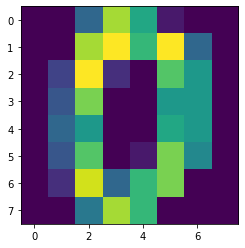

In [18]:
# We use `imshow` to visualize the the image
plt.imshow(np.reshape(X[0, :], (8, 8)));

Text(0.5, 1.0, 'The associated class with the image at index 10 is 0')

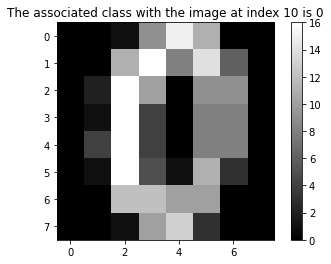

In [19]:
# Use a grayscale colormap for a better visualization
plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')
plt.colorbar()
plt.title(f"The associated class with the image at index {idx_to_test} is {y[idx_to_test]}")

<div class="alert alert-success">
    <b>EXERCICE:</b>
     <ul>
      <li>Show an image with 1 line and 1 column over 2.</li>
      <li>Show the previous image by removing the pixel on the border?</li>
      <li>Show the pixel distribution using `plt.hist`).</li>
    </ul>
</div>

In [20]:
img = X[0].reshape((8, 8))

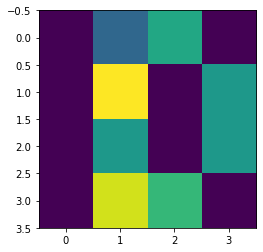

In [21]:
plt.imshow(img[::2, ::2])

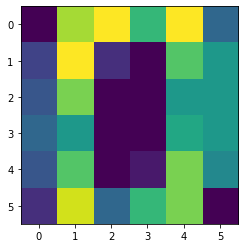

In [22]:
plt.imshow(img[1:-1, 1:-1])

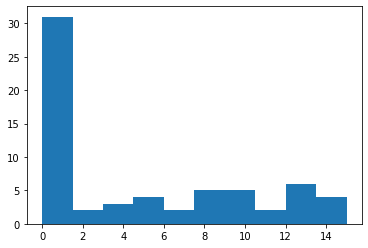

In [23]:
plt.hist(img.ravel());


## Basic statistics:

Pour mieux comprendre la base de données on va s'intéresser à quelques statistiques. 
On commence par calculer les moyennes et variances par classes pour chacun des chiffres. La moyenne par classe se visualise comme une image qui est une représentantion moyenne pour chaque chiffre de zéro à neuf. Idem pour la variance, ce qui permet alors de voir les parties avec les plus grandes variations entre les membres d'une même classe.

To better understand the database, we will check a couple of statistics.
We can start by looking at the mean and variances for each class digit.
We can plot the mean and variance which should be a 8 x 8 image.

* What is the representation of the mean and variance images?

In [24]:
classes_list = np.unique(y).astype(int)
print("Liste des classes en présence: ", classes_list)

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


<div class="alert alert-success">
    <b>EXERCICE:</b>
     <ul>
      <li>Calculer un représentant moyen du chiffre 0 (l'image qui en pixel i,j contient la valeur moyenne du pixel i,j parmis tous les 0)</li>
      <li>Avec une boucle `for` calculer le représentant moyen pour chaque chiffre</li>
      <li>Faire la même chose en remplaçant la moyenne par l'écart type</li>
      <li>Afficher toutes les images sur une grille à l'aide de la fonction `plt.subplots`</li>
    </ul>
</div>


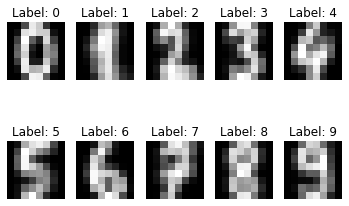

In [25]:
fig, axs = plt.subplots(ncols=5, nrows=2)
for klazz, ax in zip(classes_list, axs.ravel()):
    mask_img = y == klazz
    ax.imshow(
        X[mask_img].mean(axis=0).reshape((8, 8)),
        cmap="gray"
    )
    ax.axis("off")
    ax.set_title(f"Label: {klazz}")

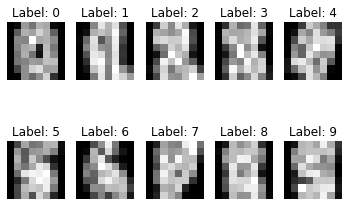

In [26]:
fig, axs = plt.subplots(ncols=5, nrows=2)
for klazz, ax in zip(classes_list, axs.ravel()):
    mask_img = y == klazz
    ax.imshow(
        X[mask_img].std(axis=0).reshape((8, 8)),
        cmap="gray"
    )
    ax.axis("off")
    ax.set_title(f"Label: {klazz}")

# II - Nearest centroids classification

The aim of this exercise is to implement your own classifier based on an intuitive idea.
For a new image, we will predict the class for which the mean digit is the closest (in the feature space).

<div class="alert alert-success">
    <b>EXERCISE:</b>
     <ul>
      <li>Split the dataset into 2 part. We will denote the with the following variable X_train, y_train, X_test, and y_test for the training data and labels and testing data and labels, respectively.</li>
      <li>For each class, compute the mean digit image on the training set. We will denote the resulting variable `centroids_train`.</li>
      <li>For each sample in the testing set, compute the nearest centroids. Compute the percentage of good predictions to evaluate the performance of your classifier.</li>
    </ul>
</div>

In [27]:
mask_train = np.ones(y.shape, dtype=bool)
mask_train[len(y) // 2:] = False
mask_test = ~mask_train

In [28]:
X_train, X_test = X[mask_train], X[mask_test]
y_train, y_test = y[mask_train], y[mask_test]

In [29]:
centroids_train = []
for klazz in classes_list:
    mask_img = y_train == klazz
    centroids_train.append(X_train[mask_img].mean(axis=0))
centroids_train = np.array(centroids_train)

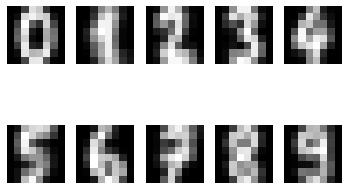

In [30]:
fig, axs = plt.subplots(ncols=5, nrows=2)
for img, ax in zip(centroids_train, axs.ravel()):
    ax.imshow(
        img.reshape((8, 8)), cmap="gray"
    )
    ax.axis("off")

In [31]:
centroids_train.shape

(10, 64)

In [32]:
from scipy.spatial.distance import cdist

y_pred = cdist(X_test, centroids_train).argmin(axis=1)

In [33]:
(np.zeros(len(y_test)) == y_test).mean()

0.09788654060066741

In [34]:
img_dst = []
for img_test in X_test:
    dist = []
    for centroid in centroids_train:
        dist.append(np.sqrt(np.sum((img_test - centroid)**2)))
    img_dst.append(dist)
img_dst = np.array(img_dst)

In [35]:
img_dst.argmin(axis=1)

array([9, 8, 4, 9, 0, 8, 9, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 2, 3, 4,
       9, 6, 7, 8, 9, 0, 2, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 9, 9, 6, 9, 0,
       9, 8, 9, 8, 4, 3, 7, 7, 3, 9, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 9, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 2, 4, 6, 3, 2, 3, 9, 1, 7, 6, 8, 4, 3, 2, 4, 0, 5, 3, 6, 9, 6,
       2, 7, 9, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 2, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 7,
       9, 1, 5, 0, 5, 5, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 2, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [36]:
y_test

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

In [37]:
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin


class NearestCentroidClassifier(BaseEstimator, ClassifierMixin):
    
    def fit(self, X, y):
        centroids_train = []
        self.classes_ = np.unique(y)
        for klazz in self.classes_:
            mask_img = y == klazz
            centroids_train.append(X[mask_img].mean(axis=0))
        self.centroids_train = np.array(centroids_train)
        return self
        
    def predict(self, X):
        return cdist(X_test, centroids_train).argmin(axis=1)

In [38]:
clf = NearestCentroidClassifier()

In [39]:
clf.fit(X_train, y_train).predict(X_test)

array([9, 8, 4, 9, 0, 8, 9, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 2, 3, 4,
       9, 6, 7, 8, 9, 0, 2, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 9, 9, 6, 9, 0,
       9, 8, 9, 8, 4, 3, 7, 7, 3, 9, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 9, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 2, 4, 6, 3, 2, 3, 9, 1, 7, 6, 8, 4, 3, 2, 4, 0, 5, 3, 6, 9, 6,
       2, 7, 9, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 2, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 7,
       9, 1, 5, 0, 5, 5, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 2, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 5, 9, 5, 4,

In [40]:
clf.score(X_test, y_test)

0.8754171301446051